In [ ]:
!pip install --user keras
!pip install --user tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
!ls


 Amazon.csv
'A TALE OF TWO CITIES.txt'
 movie.csv
 MSFT_test.csv
 MSFT_training.csv
 NFLX.csv
 NlpFinal.ipynb
 NlpVize
'Topic models with Gensim.ipynb adlı not defterinin kopyası'
 word2vec.ipynb
 word2vec.model
 yapayzekafinal.ipynb


In [ ]:
dataset_train = pd.read_csv('MSFT_training.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
x_train = []
y_train = []
for i in range (60, len(training_set_scaled)) :
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 50 , return_sequences = True , input_shape = (x_train.shape[1] , 1)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50 , return_sequences = False))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x_train , y_train , epochs = 100 , batch_size=32)

Epoch 1/100
85/85 [==============================] - 24s 163ms/step - loss: 0.0098
Epoch 2/100
85/85 [==============================] - 14s 166ms/step - loss: 0.0018
Epoch 3/100
85/85 [==============================] - 14s 163ms/step - loss: 0.0017
Epoch 4/100
85/85 [==============================] - 14s 164ms/step - loss: 0.0014
Epoch 5/100
85/85 [==============================] - 14s 169ms/step - loss: 0.0014
Epoch 6/100
85/85 [==============================] - 13s 155ms/step - loss: 0.0015
Epoch 7/100
85/85 [==============================] - 13s 149ms/step - loss: 0.0015
Epoch 8/100
85/85 [==============================] - 13s 156ms/step - loss: 0.0014
Epoch 9/100
85/85 [==============================] - 14s 163ms/step - loss: 0.0016
Epoch 10/100
85/85 [==============================] - 14s 163ms/step - loss: 0.0011
Epoch 11/100
85/85 [==============================] - 14s 163ms/step - loss: 0.0010
Epoch 12/100
85/85 [==============================] - 15s 179ms/step - loss: 0.0012
E

In [ ]:
dataset_test = pd.read_csv('MSFT_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape (-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,len(inputs)):
  x_test.append(inputs[i-60:i , 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, newshape = (x_test.shape[0],x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


16/16 [==============================] - 3s 38ms/step


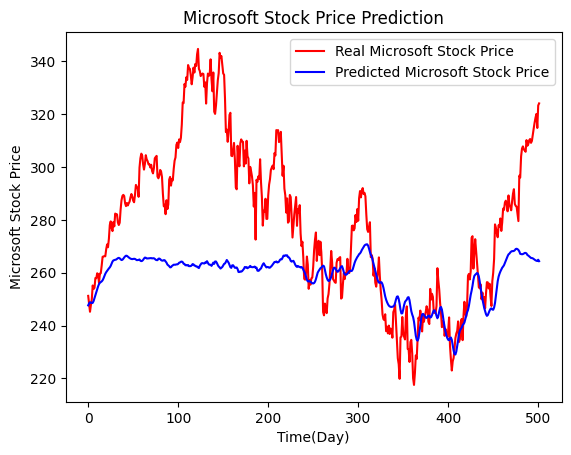

In [ ]:
plt.plot(real_stock_price, color ='red' , label = 'Real Microsoft Stock Price')
plt.plot(predicted_stock_price, color = 'blue' , label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time(Day)')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()